## Carteira
    Carteira Avançada em Python | Advanced Portfolio Wallet in Python
> **Autor:** Tiago Milani

## X

### Bibliotecas

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import os
#import seaborn as sns
import plotly.express as px

### Importação Bases

In [2]:
os.chdir("E:\\Ativos e Bolsa\\T Carteira\\Carteira\\Carteira Avançada\\V12\\teste")
nome_arquivo = "transactions_teste.xlsx"

os.chdir("E:\\Ativos e Bolsa\\T Carteira\\Carteira\\Carteira Avançada\\V12")
nome_arquivo = "transactions.csv"

if nome_arquivo.split(".")[-1] == "csv":
    df = pd.read_csv(nome_arquivo)
elif nome_arquivo.split(".")[-1] == "xlsx":
    df = pd.read_xlsx(nome_arquivo)

In [3]:
df.set_index("Ativo", inplace = True)
df.columns = pd.to_datetime(df.columns[:-2]).append(df.columns[-2:])

### Funções

In [4]:
#
def complete_hist(tab, t = False):
    cols = tab.columns
    inicio = cols[0]
    fim = cols[-1]
    tab.columns = pd.to_datetime(tab.columns)
    if t == True:
        fim = today
    date_list = pd.date_range(start=inicio, end=fim, freq='D').tolist()
    return tab.reindex(columns = date_list)

def _ir_darf(row, i, lucro_mes):
    darf_chart = {"BR": 0.15, "BRi": 0, "E": 0.15, "RF": 0.01, "RFm": 0.15, "FIIS": 0.2, "OUT":0 }
    # Ações Isento até R$20.000,00
    try:
        classe_a = classe_ativos[row].split(" ")[-1]
    except:
        classe_a = "OUT"
    tx = darf_chart[classe_a]
    earn = lucro_mes.loc[row,i]
    if classe_a == "BR":
        earn = earn-20000
    if earn <=0:
        earn = 0
    tributo = tx*earn
    return tributo
    
def classe_ir(c_ativo):
    darf_chart = {"BR": 0.15, "BRi": 0, "E": 0.15, "RF": 0.01, "RFm": 0.15, "FIIS": 0.2, "OUT":0 }
    try:
        classe_a = c_ativo.split(" ")[-1]
    except:
        classe_a = "OUT"
    return darf_chart[classe_a]

def cotacao_ativos_hist(ativos_hist, start_date, end_date):
    import yfinance as yf
    ativos_hist = [str(atv)+".SA" for atv in ativos_hist if len(atv)<=7 ] 
    atvs_str = " ".join(ativos_hist)
    indcx = yf.download(atvs_str, start = start_date, end=end_date)
    cotacoes = indcx["Close"]
    return cotacoes

def complete_df(df1, df2): # Same indexes and columns (names)
    index = df1.index
    columns = df1.columns
    for i in columns:
        for j in index:
            if not (df1.loc[j,i] > 0):
                try:
                    df1.loc[j,i] = df2.loc[j,i]
                except:
                    continue
    return df1

def df_to_transactions(df):
    # Transactions
    xx_delimit = df.index.get_loc("-")

    df = df.iloc[:,:-2]

    df.columns = pd.to_datetime(df.columns)
    transactions = df.iloc[:xx_delimit]
    transactions.columns = pd.to_datetime(transactions.columns)
    return transactions


def transactions_to_df(transactions, dfsi, classe, setor):
    # df
    clss = pd.DataFrame(classe)
    clss["C"] = clss["Classe"].apply(lambda x: x.split(" ")[0])
    class_order = ["BR", "BRi", "FIIS", "E", "RFm", "RF", "OUT"]
    clss["CT"] = pd.Categorical(clss["C"], categories= class_order, ordered = True)
    clss = clss.sort_values("CT").index

    transactions = transactions.reindex(clss)
    
    empty_row = pd.DataFrame({col: [0] for col in transactions.columns}, index=["-"])
    registers = pd.concat([transactions, empty_row, dfsi])
    registers.columns = pd.to_datetime(registers.columns)

    df = pd.concat([registers, classe, setor], axis= 1, join = "outer").fillna(0)
    
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Ativo'}, inplace=True)
    df = df.set_index("Ativo")
    
    return df 


def sharpe(cota, rf = 0.1):
    ret = (cota[-1] / cota[0]) - 1
    return (ret - rf)/(np.std(cota.pct_change()))


def classeg_to_classe(clss):
    classe_x = str(clss).split(" ")[-1]
    if classe_x[-1] == ("m" or "i"):
        classe_x = classe_x[: -1]
    return classe_x


def randomstring_to_color(string):
    
    vogals = ["a", "e", "i", "o", "u", "y"]
    
    if isinstance(string, str):
        tam = len(string) # 4-16
        size = len(string.split(" ")) # 1-2
        vog = len([v for v in vogals if v in string]) # 2-7
        cons = len([v for v in vogals if v not in string]) # 2-14

        if tam < 10:
            tam = tam * 10
        if cons < 10:
            cons = 10 * cons
    else:
        return "#000009"

    return "#"+str((tam * size * vog * cons)**3)[0:6] #2:8


def color_insertion(value, kind = "g/r", name = False):

    c_str = randomstring_to_color(value)

    names = {
                "% Return": ["g/r",'background-color: black'],
                "Quantidade": ["lb", 'background-color: black'],
                "Preço Médio":["lb", "background-color: black"],
                "Cotacao":["bk", "background-color: lightblue"],
                "Total":["lb", "background-color: black"],
                "% Carteira": ["pp",'background-color: #2c133d'],
                "Setor" : ["string_to_color", "background-color: #e3edff"] #95959e
            }

    colors = {
                "g/r": ("green", "red"), 
                "lb": ("lightblue", "lightblue"), 
                "b": ("blue", "blue"), 
                "b/p": ("blue", "pink"),
                "pp/pk": ("purple", "pink"),
                "bk":("black", "black"),
                "pp":("#d3b3ea", "#d3b3ea"),
                "string_to_color": (c_str, c_str)
            }


    if name != False:
        try:
            name = names[name]
        except:
            name = ["lb", "background-color: black"]
            backg =  name[1]
            col1, col2 = colors[name[0]]
            return f'color: {col1}; {backg}; text-align: center; padding: 10px'

        col1, col2 = colors[name[0]]
        backg =  name[1]
    else:
        col1, col2 = colors[kind]
        backg = ""

    if name[0] == "string_to_color":
        return f'color: {col1}; {backg}; text-align: center; padding: 10px'

    if float(value) < 0:
        return f'color: {col1}; {backg}; text-align: center; padding: 10px'
    elif float(value) > 0:
        return f'color: {col2}; {backg}; text-align: center; padding: 10px'
    else:
        return f'color: {col2}; {backg}; text-align: center; padding: 10px'

def apply_style(val):
    font_color = 'blue'
    bg_color = 'lightyellow'
    font_size = '14px'
    border = '1px solid black'
    text_align = 'center'
    padding = '5px'
    
    style = f'color: {font_color}; background-color: {bg_color};'
    style += f'font-size: {font_size}; border: {border};'
    style += f'text-align: {text_align}; padding: {padding};'
    return style


## Carteira

In [5]:
class Portfolio_W(object):

    def __init__(self, df):
        
        #
        global today
        global classe_ativos
        #

        self.df = df

        # Transações
        xx_delimit = df.index.get_loc("-")

        classe_ativos = df.Classe.iloc[:(xx_delimit)]
        setor_ativos = df.Setor.iloc[:(xx_delimit)]

        df = df.iloc[:,:-2]
        
        df.columns = pd.to_datetime(df.columns)
        dfsi = df.iloc[(xx_delimit+1):]
        df = df.iloc[:xx_delimit]
        columnsx = [x for x in df.columns]

        self.transacoes = df
        self.dfsi = dfsi
        self.classe_ativos = classe_ativos
        self.setor_ativos = setor_ativos

        # Today
        today = dt.datetime.now()
        weekday_today = today.weekday()
        if weekday_today >= 5:
                edate = today - dt.timedelta(days = weekday_today-4)
        elif weekday_today < 5 and today.time() < dt.datetime(1, 1, 1, 10, 30, 0, 0).time() and weekday_today > 0:
            edate = today - dt.timedelta(hours = 12)
        elif weekday_today == 0 and today.time() < dt.datetime(1, 1, 1, 10, 30, 0, 0).time():
            edate = today - dt.timedelta(days = 2, hours = 12)
        else:                             
            edate = today
        today = edate #.replace(hour = 0, minute= 0, second = 0, microsecond = 0)
        
        self.today = today

        # quant_preco_hist():
        quant_t = df.iloc[:,1::2].replace(np.nan, 0)
        price_t = df.iloc[:,0::2].replace(np.nan, 0)
        datas = quant_t.columns
        price_t.columns = pd.to_datetime([_.strftime('%Y-%m-%d %H:%M:%S') for _ in price_t.columns])
        quant_t.columns = pd.to_datetime([_.strftime('%Y-%m-%d %H:%M:%S') for _ in quant_t.columns])

        self.quant_t = quant_t
        self.price_t = price_t


        # position_hist(): # Posição por dia
        position_t = quant_t.cumsum(axis = 1)
        position_t = complete_hist(position_t, t = True).ffill(axis = 1)
        self.position_t = position_t


        # moviment_hist(): # Transações
        debcred_t = quant_t * price_t 
        moviment_t = abs(debcred_t)
        volvend_t = debcred_t.applymap(lambda x: np.where(x<0, x, 0))
        moviment_t.loc["Movimentacao"] = moviment_t.sum()
        debcred_t.loc["Deb/Cred"] = -debcred_t.sum()
        volvend_t.loc["Volume Vendas"] = -volvend_t.sum()

        self.moviment_t = moviment_t 
        self.debcred_t = debcred_t
        self.volvend_t = volvend_t


        # result_tab_res(): # Tamanhos e dimensões
        len_x = len(quant_t)
        len_y = len(quant_t.columns)

        quantidade = np.zeros(len_x)
        total = np.zeros(len_x)
        pm = np.zeros(len_x)
        lucros = np.zeros((len_x, len_y))

        for i in range(len_y):        # Coluna / Negociação       
            for j in range(len_x):    # Linha / Ativo
                qtd = quant_t.iloc[j,i]
                quantidade[j] += qtd
                if qtd >= 0:
                    mtt = (qtd * price_t.iloc[j,i])
                else:
                    mtt = (qtd * pm[j])
                    lucros[j,i] = mtt - (qtd * price_t.iloc[j,i])
                total[j] += mtt
                if quantidade[j]>0:
                    pm[j] = total[j] / quantidade[j]


        tab_res_py = pd.DataFrame({'Quantidade': quantidade, 'Preço Médio': pm, 'Total(R$)': total})
        tab_res_py.index = quant_t.index
        lucros = pd.DataFrame(lucros, columns=price_t.columns).fillna(0)
        lucros.index = quant_t.index

        lucros = pd.concat([lucros, classe_ativos], axis = 1)
        
        self.tab_res = tab_res_py
        self.lucros = lucros
        self.classe_ativos = classe_ativos


        # imposto_mes_h():
        lucros = lucros.iloc[:,:-1]

        meses_lucros = list(dict.fromkeys([str(x)[0:7] for x in lucros.columns if type(x)!= str]))

        lucro_mes = pd.DataFrame()
        imposto_mes = pd.DataFrame()

        for i in meses_lucros:
            cols = [x for x in lucros.columns if str(x)[0:7]==i]
            lucro_mes[i] = lucros[cols].sum(axis=1)
            imposto_mes[i] = [x for x in lucro_mes.index]
            imposto_mes[i] = imposto_mes[i].apply(_ir_darf, args=[i, lucro_mes])

        imposto_mes.index = classe_ativos.index
        imposto_mes = imposto_mes.replace(0,np.nan).dropna(axis=1, how="all")
        imposto_mes.dropna(axis = 0, inplace=True, how = "all")
        imposto_mes["Classe"] = classe_ativos
        imposto_mes["Taxa IR"] = imposto_mes["Classe"].apply(classe_ir)
        imposto_mes = imposto_mes.fillna(0)

        self.imposto_mes = imposto_mes


        # cotacao_ativos():
        ativos_hist = df.index

        start_date = columnsx[0]
        end_date = today
            
        cotacoes_periodo = cotacao_ativos_hist(ativos_hist, start_date, end_date)
        cotacoes_periodo.columns = [str(x).split(".")[0] for x in cotacoes_periodo.columns]
        cotacoes_periodo = complete_hist(cotacoes_periodo.T)
        cotacoes = cotacoes_periodo.ffill(axis = "columns")

        # montantes_func():
        rf_assets = classe_ativos.reset_index().set_index("Classe").loc[["OUT RF" or "RF"]]["Ativo"]
        rv_assets = [x for x in position_t.index if x not in list(rf_assets)]

        position = position_t.loc[rv_assets, :]

        price_t.columns = pd.to_datetime(price_t.columns)
        cotacoes.columns = pd.to_datetime(cotacoes.columns)
        cotacoes = complete_df(cotacoes, price_t).replace(0, np.nan).bfill(axis = 1).ffill(axis=1)
        try:
            cotacoes.columns = position.columns
        except: # Não Atualizado para hoje
            cotacoes.columns = position.columns[:-1]
        montantes_t = position*cotacoes

        mont_rf = position_t.loc[rf_assets] * complete_hist(price_t.loc[rf_assets]).interpolate(method = "linear", axis = 1)
        montantes_t = pd.concat([montantes_t, mont_rf])

        montantes_t = montantes_t.dropna(axis=1, thresh=10).fillna(0)
        self.montantes_t = montantes_t
        self.cotacoes = cotacoes 


        # dados_operacoes_t(cum_sum = False):
        remun = dfsi.loc[["Bonificação", "Aporte Externo", "Dividendo"]].fillna(0)
        simple = complete_hist(remun.iloc[:,::2], t=True)
        simple.columns = [_.date() for _ in simple.columns]
        simple.fillna(0, inplace=True)

        montantes_t = montantes_t.sum(axis = 0)
        montantes_t = pd.DataFrame(montantes_t, columns= ["Montante Mercado"])
        montantes_t.index = pd.to_datetime(montantes_t.index).date

        moviment_t.columns = pd.to_datetime(moviment_t.columns).date
        debcred_t.columns = pd.to_datetime(debcred_t.columns).date
        volvend_t.columns = pd.to_datetime(volvend_t.columns).date

        simple = simple.reindex(columns=montantes_t.index)

        moviment_t = moviment_t.iloc[-1,:]
        debcred_t = debcred_t.iloc[-1,:]
        volvend_t = volvend_t.iloc[-1,:]

        carteira_mark_t = pd.DataFrame([moviment_t,debcred_t, volvend_t])
        carteira_mark_t = carteira_mark_t.reindex(columns = pd.to_datetime(montantes_t.index).date).fillna(0)
        montantes_t = montantes_t.T
        carteira_m = carteira_mark_t
        carteira_m.loc["Montante Mercado"] = montantes_t.loc["Montante Mercado"].fillna(0)
        carteira_m.loc["Aporte Externo"] = simple.loc["Aporte Externo"].fillna(0)
        carteira_m.loc["Bonificação"] = simple.loc["Bonificação"].fillna(0)
        carteira_m.loc["Dividendo"] = simple.loc["Dividendo"].fillna(0)
            
        carteira_m.loc["CC"] = carteira_m.loc["Deb/Cred"].cumsum() + carteira_m.loc["Aporte Externo"].cumsum() + carteira_m.loc["Dividendo"].cumsum() + carteira_m.loc["Bonificação"].cumsum()

        patrimonio = carteira_m.loc["Montante Mercado"] + carteira_m.loc["CC"]
        carteira_m.loc["Patrimonio"] = patrimonio
        
        self.carteira_m = carteira_m
        self.patrimonio = patrimonio
        self.simple = simple

        self.patrimonio_value = self.patrimonio[-1]
        self.cc_value = self.carteira_m.T.iloc[-1,:]["CC"] 

        # cotizacao_f(base = 100):
        c_capital = pd.concat([patrimonio,simple.loc["Aporte Externo"]], axis = 1).fillna(0)
        c_patrimonio = c_capital[0]
        c_aportes = c_capital["Aporte Externo"].cumsum()
        cota_over = 100 * c_patrimonio/c_aportes


        self.cota_over = cota_over

        #
        self.mont_classe = "Rodar a Função 'class_anlysis' "

    def class_analysis(self, pct = True, out = False):
        classe_a = self.classe_ativos
        classe_a = classe_a.apply(lambda x: classeg_to_classe(x))
        mont = self.montantes_t.join(classe_a)
        mont_classe = mont.groupby("Classe").sum()
        mont_classe = pd.concat([mont_classe,self.carteira_m.loc[["CC"]]])
        self.mont_classe = mont_classe

        mont = mont_classe
        if pct == True:
            mont = 100* mont / mont.sum()
        else:
            mont.loc["Total"] = 123

        df_transposed = mont.T
        df_transposed.reset_index(inplace=True)
        df_transposed.columns = ['Date'] + list(df_transposed.columns[1:])
        df_transposed['Date'] = pd.to_datetime(df_transposed['Date'])
        df_melted = pd.melt(df_transposed, id_vars=['Date'], var_name='Asset Type', value_name='Portfolio Value')

        fig = px.area(df_melted, x="Date", y="Portfolio Value", color="Asset Type", title="Asset Allocation through Time")
        fig.update_layout(yaxis=dict(type='linear'))
        fig.show()

        if out == True:
            mont.loc["Total"] = mont.sum()
            print(mont.iloc[:,-1])

    
    def save(self):
        self.df.to_csv("transactions_test.csv")


    def save_disc(self):
        self.df.to_csv("transactions.csv")
    

    def split_group(self, ativo, parcela):
        df = df_to_transactions(self.df)

        columns_p = df.columns[::2]
        columns_q = df.columns[1::2]

        ativo_p = df.loc[ativo, columns_p].astype(float)
        ativo_q = df.loc[ativo, columns_q].astype(float)

        df.loc[ativo, columns_p] = ativo_p / parcela
        df.loc[ativo, columns_q] = ativo_q * parcela

        df = transactions_to_df(df, self.dfsi, self.classe_ativos, self.setor_ativos)
        self.__init__(df)
        self.save()
    

    def new_operation(self, ativo, preco, quantidade, asset_type = "BR", sector = np.nan, data = False):
        if data != False and type(data) == str:
            data = pd.to_datetime(data)
        elif isinstance(data, pd.Timestamp):
            pass
        else:
            data = self.today
            data = pd.Timestamp(data.year, data.month, data.day, data.hour)

        transacoes = self.transacoes

        data_p = data
        data_q = data + pd.Timedelta(microseconds = 100000)

        if ativo in transacoes.index.tolist():
            classe_a = self.classe_ativos
            setor_a = self.setor_ativos
        else:
            classe_a = self.classe_ativos
            setor_a = self.setor_ativos
            classe_a.loc[ativo] = asset_type
            setor_a.loc[ativo] = sector

        transacoes.loc[ativo, data_p] = preco
        transacoes.loc[ativo, data_q] = quantidade
        
        df = transactions_to_df(transacoes, self.dfsi, self.classe_ativos, self.setor_ativos)

        self.__init__(df)
        self.save()
    

    def contribution(self, value, wtype = "Aporte", data=False): # "Aporte/Dividendo/Bonificacao" , "yyyy-mm-dd"
        if data != False and type(data) == str:
            data = pd.to_datetime(data)
        elif isinstance(data, pd.Timestamp):
            pass
        else:
            data = self.today
            data = pd.Timestamp(data.year, data.month, data.day, data.hour)
        
        if "D" in wtype:
            row = "Dividendo"
        elif "B" in wtype:
            row = "Bonificação"
        else:
            row = "Aporte Externo"
        
        dfsi = self.dfsi
        dfsi.loc[row, data] = value
        dfsi.loc[row, data+pd.Timedelta(microseconds = 100000)] = 0

        df = transactions_to_df(self.transacoes, dfsi, self.classe_ativos, self.setor_ativos)

        self.__init__(df)
        self.save()
    

    def dashboard(self):
        prices_yest = self.cotacoes.iloc[:,[-2]].fillna(0)
        prices_today = self.cotacoes.iloc[:,[-1]].fillna(0)
        var_yest = 100 * (prices_today/prices_yest.values - 1)
        dd_w = self.tab_res.copy()
        dd_w = dd_w.loc[dd_w["Quantidade"] > 0]
        patrimonio = self.patrimonio_value
        clss = pd.concat([self.classe_ativos, self.setor_ativos], axis = 1)

        dd_w["Cotacao"] = prices_today.apply(lambda x: np.round(x, 2))
        dd_w["Quantidade"] = dd_w["Quantidade"].apply(int)
        dd_w["Total"] = dd_w["Quantidade"]* dd_w["Cotacao"]
        dd_w["% Return"] = np.round(100 * dd_w["Total"]/dd_w["Total(R$)"],2) - 100
        dd_w["Preço Médio"] = dd_w["Preço Médio"].apply(lambda x: np.round(x, 2))

        del dd_w["Total(R$)"]

        dd_w.loc["CC", "Total"] = self.cc_value
        dd_w["% Carteira"] = 100*dd_w["Total"]/patrimonio
        dd_w["R%day"] = var_yest

        dd_w = dd_w.fillna(0)
        dd_w_ind = ["CC"] + dd_w.sort_values(["Total"], ascending=False).drop("CC").index.to_list()
        dd_w = dd_w.loc[dd_w_ind]
        dd_w = dd_w.applymap(lambda x: str(np.round(x, 2))).join(clss, how = "left")
        dd_w.loc["CC", ["Classe", "Setor"]] = "RF"

        # Style
        #from matplotlib.colors import LinearSegmentedColormap
        #colors = ['red', 'darkgreen']
        #cmap = LinearSegmentedColormap.from_list('Custom', colors)
        #dd_w = dd_w.style.background_gradient(low = 0.9, high = 0.1, cmap = cmap)
        # dd_returns = dd_w[["% Return"]].style.applymap(color_negative_red)

        dd_w = dd_w.style.applymap(apply_style)
        styled_df = dd_w.apply(lambda x: [color_insertion(x[i], name = x.name) for i in range(len(x))])

        return styled_df
    
    def isharpe(self, rf = 0, dias = 365):
        cota = self.cota_over[-dias:]
        ret = (cota[-1] / cota[0]) - 1
        return (ret - rf)/(np.std(cota.pct_change()))
    
    
    def plot_return(self, figsize = False):
        if figsize != False:
            plt.figure(figsize=figsize)
        plt.style.use("ggplot")
        plt.plot(self.cota_over, color = "darkblue", linewidth = 0.8)
        plt.xticks(rotation = 90)
    

    def plot_ind(self, func, moving_days = False, agg = False, figsize = False, pct = False):
        if figsize != False:
            plt.figure(figsize=figsize)   

        if moving_days == False:
            moving_days = 1

        if pct == False:
            cota = self.cota_over
        else:
            cota = self.cota_over.pct_change()

        plt.plot(cota.rolling(moving_days).apply(func))

        if agg == True:
            print("LAST {} moving days \n".format(moving_days), cota.tail(moving_days).agg(["min", "max", "median", "mean", "std", "var", "skew", "kurt"]))


## View

In [6]:
wallet = Portfolio_W(df)

[*********************100%***********************]  57 of 57 completed

1 Failed download:
- BRML3.SA: No data found, symbol may be delisted


### Anotações

#### Teste Indicadores

In [7]:
wallet.isharpe(rf = 0.08, dias = 1020)

7.836782675443511

#### Plots / Gráficos

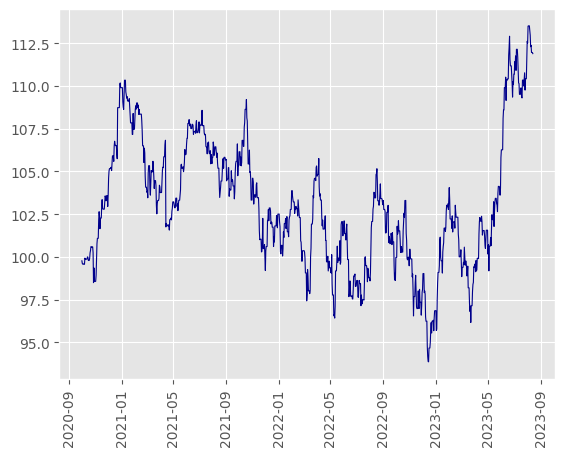

In [8]:
wallet.plot_return()

LAST 60 moving days 
 min       109.302748
max       113.521862
median    110.866781
mean      111.155182
std         1.195686
var         1.429664
skew        0.406876
kurt       -0.800866
dtype: float64


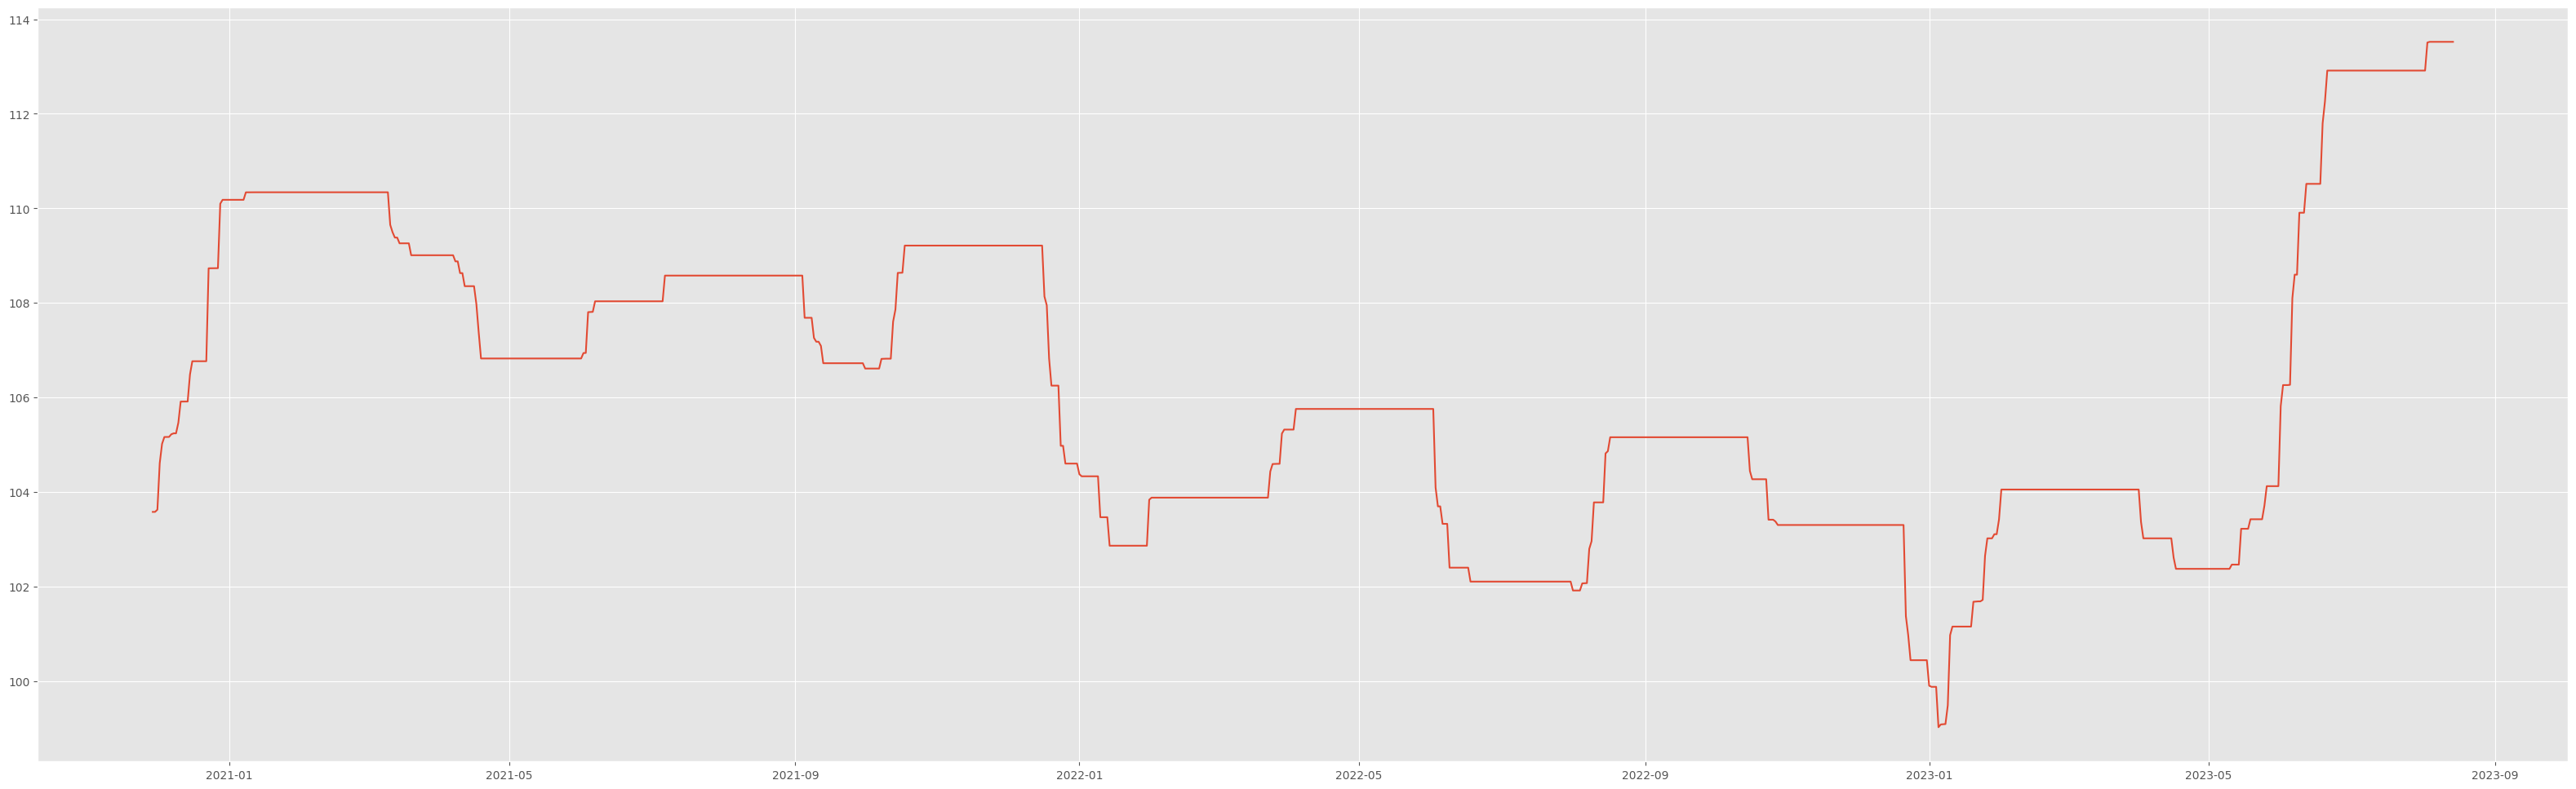

In [9]:
wallet.plot_ind(np.max, 60, True, pct = False, figsize=(40,12))

#### Asset Type Graph x Time

In [15]:
wallet.class_analysis(pct = True, out = True)

C:\Users\Titom\AppData\Local\Temp\ipykernel_40972\3351721478.py:226: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

C:\Users\Titom\AppData\Local\Temp\ipykernel_40972\3351721478.py:226: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



BR        67.800140
E         10.693073
FIIS       7.446644
RF        12.270022
CC         1.790121
Total    100.000000
Name: 2023-08-14 00:00:00, dtype: float64


#### Start Dashboard

In [11]:
wallet.patrimonio_value

241798.92010571464

In [12]:
wallet.dashboard()

,Quantidade,Preço Médio,Cotacao,Total,% Return,% Carteira,R%day,Classe,Setor
Ativo,,,,,,,,,
CC,0.0,0.0,0.0,5308.76,0.0,2.2,0.0,RF,RF
LFTS11,269.0,103.35,109.82,29541.58,6.26,12.22,0.0,RFm,RF
SIMH3,1520.0,8.32,10.67,16218.4,28.25,6.71,0.57,BR,Freight & Logistics Services
BBAS3,327.0,29.8,47.25,15450.75,58.56,6.39,-0.48,BR,Banking Services
CGRA3,549.0,30.4,26.16,14361.84,-13.95,5.94,3.65,BR,Diversified Retail
WIZC3,2270.0,7.61,6.18,14028.6,-18.78,5.8,0.0,BR,Insurance
SAPR3,3027.0,3.86,4.3,13016.1,11.52,5.38,0.23,BR,Water Utilities
ABCB4,635.0,16.76,18.69,11868.15,11.52,4.91,0.54,BR,Banking Services
MYPK3,782.0,13.07,14.97,11706.54,14.51,4.84,0.81,BR,Automobiles & Auto Parts


#### Teste Nova Aquisição e Aporte

In [13]:
wallet.new_operation("KEPL3", 10, 100, "BR", "Agiculture Industry")
wallet.contribution(100, "A")

[*********************100%***********************]  57 of 57 completed

1 Failed download:
- BRML3.SA: No data found, symbol may be delisted
[*********************100%***********************]  57 of 57 completed

1 Failed download:
- BRML3.SA: No data found, symbol may be delisted


InvalidIndexError: Reindexing only valid with uniquely valued Index objects